In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#other imports?
from scipy.interpolate import make_interp_spline

# Exercise 1

Using the standard linear algebra method of this Section, fit
the straight line y = m x + b to the x, y, and σy values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for σx and ρxy. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance σ
2
m on the slope of
the line?

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv")

In [ ]:
Data.head()

,#ID,x,y,σy,σx,ρxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


In [ ]:
Data_1 = Data[4:20]

In [ ]:
DataA1 = Data_1.to_numpy(dtype = None, copy=False)

In [ ]:
#DataA1

In [ ]:
def line (x, m, b):
  return m * x + b


In [ ]:
def makeList (array, col):
  List=[]
  for i in array:
    List.append(i[col])
  return List

In [ ]:
def listToArray(List):
  Array = []
  for i in range(len(List)):
    Array.append(List[i])
  return Array


In [ ]:
def eq3 (List):
  arrayA = []
  for i in range(len(List)):
    arrayA.append([1,List[i]])
  return arrayA


In [ ]:
def eq4 (inArray):
  C = np.diag(makeList(inArray,3))
  lst = makeList(inArray,3)
  for i in range(len(C)):
    for j in range(len(C[i])):
      C[i][j]=C[i][j]**2
  return C

In [ ]:
matrix_Y1 = makeList(DataA1,2)
matrix_A1 = eq3(makeList(DataA1,1))
matrix_C1 = eq4(DataA1)

matrix_A_t1 = np.transpose(matrix_A1)
matrix_C_inv1 = np.linalg.inv(matrix_C1)

In [ ]:
def eq5(y,A,At,C):
  Y = listToArray(y) #need list to array function
  pt1 = np.linalg.inv( np.dot( np.dot(At,C),A ) )
  pt2 = np.dot( np.dot(At,C),Y )
  return np.dot(pt1, pt2)

In [ ]:
eq5(matrix_Y1,matrix_A1,matrix_A_t1,matrix_C_inv1)

array([34.04772776,  2.23992083])

Text(0, 0.5, 'y')

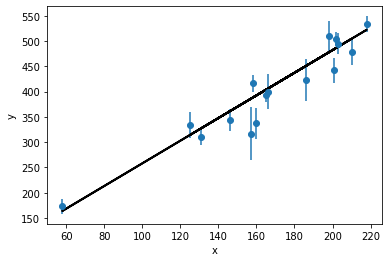

In [ ]:
#plotting
x = Data_1.x.values
y = Data_1.y.values
yerr = Data_1.σy.values

plt.errorbar(x, y, yerr,fmt="o")
plt.plot(x, 2.23992083 * x + 34.04772776, "k", lw=2)

plt.xlabel("x")
plt.ylabel("y")

The x,y points and their uncertainties from rows 5 to 20 in Table 1 are plotted above. The line is the "best fit" linear equation with m and b values found through the standard linear algebra method of section 1 in HoggBoveyLang2017.

In [ ]:
matrix_cov1 = np.linalg.inv( np.dot( np.dot(matrix_A_t1,matrix_C_inv1),matrix_A1 ) )

In [ ]:
matrix_cov1

array([[ 3.32922601e+02, -1.88954491e+00],
       [-1.88954491e+00,  1.16166311e-02]])

standard uncertainty variance on the slope of the line = 1.16e-2

# Exercise 2

Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance σ
2
m on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?

In [ ]:
DataA2 = Data.to_numpy(dtype = None, copy=False)

In [ ]:
matrix_Y2 = makeList(DataA2,2)
matrix_A2 = eq3(makeList(DataA2,1))
matrix_C2 = eq4(DataA2)

matrix_A_t2 = np.transpose(matrix_A2)
matrix_C_inv2 = np.linalg.inv(matrix_C2)

In [ ]:
eq5(matrix_Y2,matrix_A2,matrix_A_t2,matrix_C_inv2)

array([213.27349198,   1.07674752])

Text(0, 0.5, 'y')

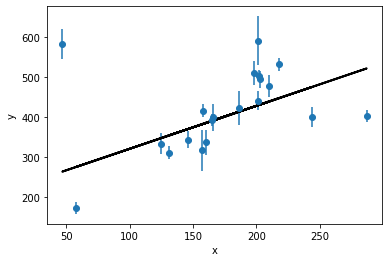

In [ ]:
#plotting
x = Data.x.values
y = Data.y.values
yerr = Data.σy.values

plt.errorbar(x, y, yerr,fmt="o")
plt.plot(x, 1.07674752 * x + 213.27349198, "k", lw=2)
plt.xlabel("x")
plt.ylabel("y")

The x,y points and their uncertainties plotted above include all the data points in Table 1. The line is the "best fit" linear equation found again through the 'standard linear algebra' method. The result is less in line with the bulk of the data points than in exercise 1. The new points are outlying points significantly different in x and y. These are skewing the line of fit to have a smaller slope.

In [ ]:
matrix_cov2 = np.linalg.inv( np.dot( np.dot(matrix_A_t2,matrix_C_inv2),matrix_A2 ) )

In [ ]:
matrix_cov2

array([[ 2.07188189e+02, -1.05427206e+00],
       [-1.05427206e+00,  5.99181008e-03]])

standard uncertainty variance on the slope of the line = 5.99e-3

# Exercise 3

Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix A containing the
values x
2
i
, and another element to vector X (call it q). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
g(x) = q x2 + m x + b

In [ ]:
def eq3_qua (List):
  arrayA = []
  for i in range(len(List)):
    arrayA.append([1,List[i],List[i]**2])
  return arrayA

In [ ]:
matrix_A3 = eq3_qua(makeList(DataA1,1))

In [ ]:
matrix_A3

[[1, 203.0, 41209.0],
 [1, 58.0, 3364.0],
 [1, 210.0, 44100.0],
 [1, 202.0, 40804.0],
 [1, 198.0, 39204.0],
 [1, 158.0, 24964.0],
 [1, 165.0, 27225.0],
 [1, 201.0, 40401.0],
 [1, 157.0, 24649.0],
 [1, 131.0, 17161.0],
 [1, 166.0, 27556.0],
 [1, 160.0, 25600.0],
 [1, 186.0, 34596.0],
 [1, 125.0, 15625.0],
 [1, 218.0, 47524.0],
 [1, 146.0, 21316.0]]

In [ ]:
matrix_Y3 = makeList(DataA1,2)
matrix_C3 = eq4(DataA1)

matrix_A_t3 = np.transpose(matrix_A3)
matrix_C_inv3 = np.linalg.inv(matrix_C3)

In [ ]:
eq5(matrix_Y3,matrix_A3,matrix_A_t3,matrix_C_inv3)

array([7.28946265e+01, 1.59605045e+00, 2.29888841e-03])

Text(0, 0.5, 'y')

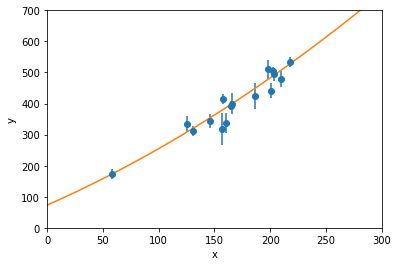

In [ ]:
x = Data_1.x.values
y = Data_1.y.values
yerr = Data_1.σy.values

plt.errorbar(x, y, yerr,fmt="o")

x_ = np.array([1,2,3,4,5,6,7,8,9])
X_Y_Spline = make_interp_spline(x_, 0.002298 * x_**2 + 1.59 * x_ + 72.89)
 
X_ = np.linspace(0, 300, 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.ylim(0,700)
plt.xlim(0,300)
plt.xlabel("x")
plt.ylabel("y")

The plotted x,y values and their uncertainties are the same data points used in Exercise 1. The quadratic function displayed is the 'best quadratic relationship' found through the linear algebra method, but altered slightly to find the constant multiplying the x^2 term. 

# Exercise 4

Imagine a set of N measurements ti
, with uncertainty variances σ
2
ti, all of the same (unknown) quantity T. Assuming the generative
model that each ti differs from T by a Gaussian-distributed offset, taken from
a Gaussian with zero mean and variance σ
2
ti, write down an expression for
the log likelihood ln L for the data given the model parameter T. 

$ln \mathscr{L} = K - \sum\limits_{i=1}^N \frac{[t_i-T]^2}{2\sigma_{t_i}^2}$

**How this was obtained**: expression obtained from $(11)$ in the [HoggBoveyLang2017](https://cosmo.nyu.edu/hogg/research/2010/08/17/straightline.pdf) file and replacing $y_i$ with $t_i$, and the model trend line equation ($mx_i+b$) with the model parameter ($T$)

$\mathscr{L}$ is the likelyhood of conditional probabilities

$K$ is a constant

$t_i$ is a singular dependant measurement

$T$ is the model parameter (the expected value of $t_i$ if it was identical to the model's prediction)

$N$ is the number of measurements

$\sigma_{t_i}^2$ are the uncertanty variances at each $t_i$ measurement


